<a href="https://colab.research.google.com/github/stanimman/Lectures/blob/master/Linear_Logisticipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img height="60px" src="https://colab.research.google.com/img/colab_favicon.ico" align="left" hspace="20px" vspace="5px">

<h1>Welcome to Colaboratory!</h1>
Colaboratory is a free Jupyter notebook environment that requires no setup and runs entirely in the cloud. See our [FAQ](https://research.google.com/colaboratory/faq.html) for more info.

## Getting Started
- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Loading and saving data: Local files, Drive, Sheets, Google Cloud Storage](/notebooks/io.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Using Google Cloud BigQuery](/notebooks/bigquery.ipynb)
- [Forms](/notebooks/forms.ipynb), [Charts](/notebooks/charts.ipynb), [Markdown](/notebooks/markdown_guide.ipynb), & [Widgets](/notebooks/widgets.ipynb)
- [TensorFlow with GPU](/notebooks/gpu.ipynb)
- [TensorFlow with TPU](/notebooks/tpu.ipynb)
- [Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course/): [Intro to Pandas](/notebooks/mlcc/intro_to_pandas.ipynb) & [First Steps with TensorFlow](/notebooks/mlcc/first_steps_with_tensor_flow.ipynb)
- [Using Colab with GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)


## Highlighted Features
### Seedbank

Looking for Colab notebooks to learn from? Check out [Seedbank](https://tools.google.com/seedbank/), a place to discover interactive machine learning examples.

### Linear Regression

In [13]:
!git clone https://github.com/jdwittenauer/ipython-notebooks.git

Cloning into 'ipython-notebooks'...
remote: Enumerating objects: 613, done.
remote: Total 613 (delta 0), reused 0 (delta 0), pack-reused 613
Receiving objects: 100% (613/613), 33.01 MiB | 33.37 MiB/s, done.
Resolving deltas: 100% (309/309), done.


In [16]:
!ls ipython-notebooks/data

bird_small.mat	  ex3data1.mat	  ex7data1.mat	       movie_ids.txt
bird_small.png	  ex3weights.mat  ex7data2.mat	       spamSample1.txt
emailSample1.txt  ex4data1.mat	  ex7faces.mat	       spamSample2.txt
emailSample2.txt  ex4weights.mat  ex8data1.mat	       spamTest.mat
ex1data1.txt	  ex5data1.mat	  ex8data2.mat	       spamTrain.mat
ex1data2.txt	  ex6data1.mat	  ex8_movieParams.mat  stock_data.csv
ex2data1.txt	  ex6data2.mat	  ex8_movies.mat       vocab.txt
ex2data2.txt	  ex6data3.mat	  manning.csv


In [19]:
import pandas as pd
path = 'ipython-notebooks/data/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Years_of_Experience', 'Salary_in_lakhs'])
data.head()

,Years_of_Experience,Salary_in_lakhs
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


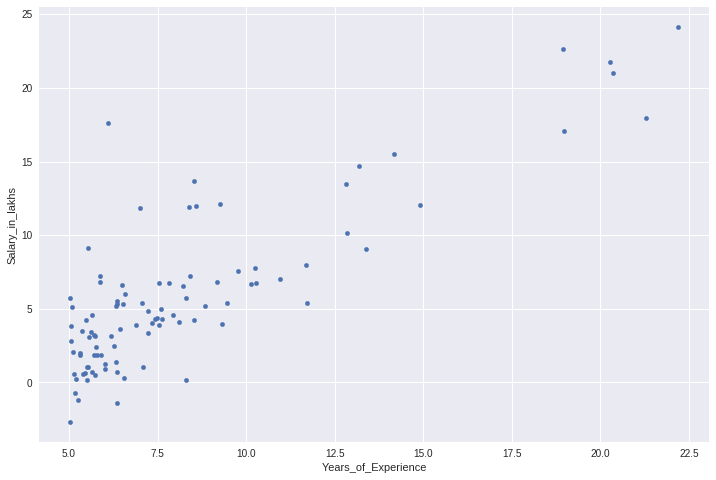

In [21]:
data.plot(kind='scatter', x='Years_of_Experience', y='Salary_in_lakhs', figsize=(12,8))

In [0]:
import numpy as np
# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

In [0]:
X = np.matrix(X.values)
y = np.matrix(y.values)

In [32]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [37]:
x = np.array(X[:, 0].A1)
x

array([ 6.1101,  5.5277,  8.5186,  7.0032,  5.8598,  8.3829,  7.4764,
        8.5781,  6.4862,  5.0546,  5.7107, 14.164 ,  5.734 ,  8.4084,
        5.6407,  5.3794,  6.3654,  5.1301,  6.4296,  7.0708,  6.1891,
       20.27  ,  5.4901,  6.3261,  5.5649, 18.945 , 12.828 , 10.957 ,
       13.176 , 22.203 ,  5.2524,  6.5894,  9.2482,  5.8918,  8.2111,
        7.9334,  8.0959,  5.6063, 12.836 ,  6.3534,  5.4069,  6.8825,
       11.708 ,  5.7737,  7.8247,  7.0931,  5.0702,  5.8014, 11.7   ,
        5.5416,  7.5402,  5.3077,  7.4239,  7.6031,  6.3328,  6.3589,
        6.2742,  5.6397,  9.3102,  9.4536,  8.8254,  5.1793, 21.279 ,
       14.908 , 18.959 ,  7.2182,  8.2951, 10.236 ,  5.4994, 20.341 ,
       10.136 ,  7.3345,  6.0062,  7.2259,  5.0269,  6.5479,  7.5386,
        5.0365, 10.274 ,  5.1077,  5.7292,  5.1884,  6.3557,  9.7687,
        6.5159,  8.5172,  9.1802,  6.002 ,  5.5204,  5.0594,  5.7077,
        7.6366,  5.8707,  5.3054,  8.2934, 13.394 ,  5.4369])

Text(0.5,1,'Predicted Salary_in_lakhs vs. Years_of_Experience')

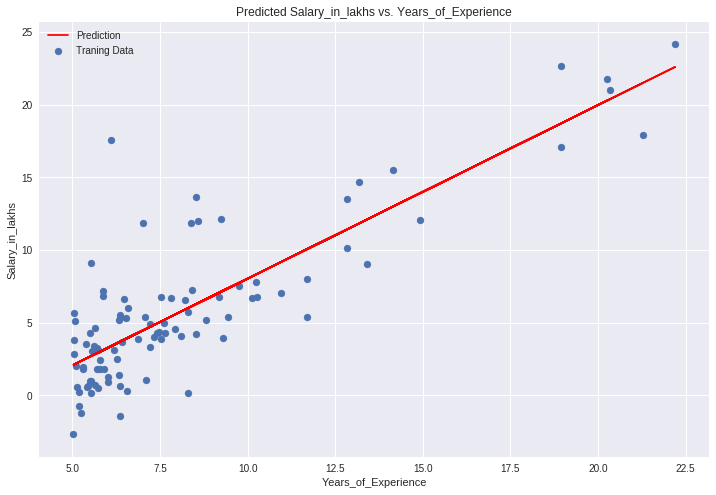

In [45]:
import matplotlib.pyplot as plt
x = np.array(X[:, 0].A1) # A1 change the shape and flattenns the matrix
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Years_of_Experience, data.Salary_in_lakhs, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Years_of_Experience')
ax.set_ylabel('Salary_in_lakhs')
ax.set_title('Predicted Salary_in_lakhs vs. Years_of_Experience')

In [47]:
path = 'ipython-notebooks/data/ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [0]:
# set X (training data) and y (target variable)
cols = data2.shape[1]
X = data2.iloc[:,0:cols-1]
y = data2.iloc[:,cols-1:cols]

In [0]:
X = np.matrix(X.values)
y = np.matrix(y.values)

In [57]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [58]:
y_pred = model.predict(X)
# The coefficients
print('Coefficients: \n', model.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y, y_pred))
print('Variance score: %.2f' % r2_score(y, y_pred))

Coefficients: 
 [[  139.21067402 -8738.01911233]]
Mean squared error: 4086560101.21
Variance score: 0.73


In [0]:
## Logistic 

In [0]:
from sklearn.datasets import load_digits
digits = load_digits()

In [13]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print( 'Image Data Shape' , digits.data.shape)
# Print to show there are 1797 labels (integers from 0–9)
print('Label Data Shape' , digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


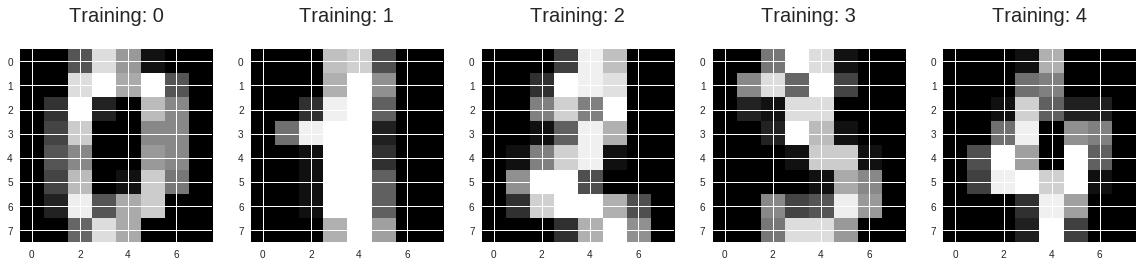

In [14]:
import numpy as np 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

In [0]:
from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

In [17]:
logisticRegr.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
import os, cv2, itertools
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
logisticRegr.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
predictions = logisticRegr.predict(x_test)

In [20]:
score = logisticRegr.score(x_test, y_test)
print(score)

0.9533333333333334


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [24]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


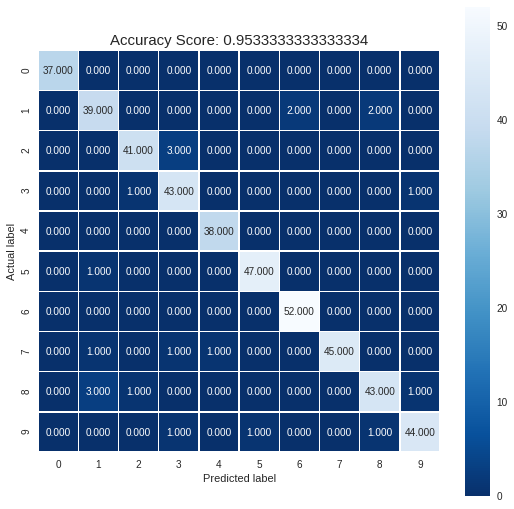

In [25]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [26]:
#https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


HTTPError: ignored

In [6]:
!pip install -q kaggle-cli
!kg download -u 'stanimman' -p '****' -c 'dogs-vs-cats-redux-kernels-edition'

/usr/local/lib/python3.6/dist-packages/mechanicalsoup/browser.py:37: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 37 of the file /usr/local/lib/python3.6/dist-packages/mechanicalsoup/browser.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  response.content, **soup_config)
downloading https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition/download/test.zip

test.zip 100% |######################################| Time: 0:00:09  29.5 MiB/s

downloading https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition/download/train.zip

train.zip 100% |#####################################| Time: 0:00:24  22.4 MiB/s

downloading https://www.ka

In [0]:
!unzip -q train.zip

In [0]:
!unzip -q test.zip

In [5]:
TRAIN_DIR = 'train/'
TEST_DIR = 'test/'

ROWS = 64
COLS = 64
CHANNELS = 3

train_images = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR)] # use this for full dataset
test_images =  [TEST_DIR+i for i in os.listdir(TEST_DIR)]


# Sample from train and test data.
"""
sample_size = 5000
train_dogs =   [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'dog' in i]
train_cats =   [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'cat' in i]
train_images = np.hstack([np.random.choice(train_dogs, sample_size, replace=False),
                          np.random.choice(train_cats, sample_size, replace=False)])

test_images =  test_images[:sample_size]
"""

def read_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_COLOR) #cv2.IMREAD_GRAYSCALE
    return cv2.resize(img, (ROWS, COLS), interpolation=cv2.INTER_CUBIC)


def prep_data(images):
    """
    Returns:
        X(n_x, m)
        y(1, m) -- 1: dog, 0: cat
    """
    m = len(images)
    n_x = ROWS * COLS * CHANNELS
    
    X = np.ndarray((n_x, m), dtype=np.uint8)
    y = np.zeros((1, m))
    print ("X shape is {}".format(X.shape))
    
    for i, image_file in enumerate(images):
        image = read_image(image_file)
        X[:, i] = np.squeeze(image.reshape((n_x, 1)))
        if 'dog' in image_file.lower():
            y[0, i] = 1
        elif 'cat' in image_file.lower():
            y[0, i] = 0
        else:# if neither dog nor cat exist, return the image index (this is the case for test data)
            y[0, i] = image_file.split('/')[-1].split('.')[0]
        if i%1000 == 0: print('Processed {} of {}'.format(i, m))
    
    return X, y

X_train, y_train = prep_data(train_images)
X_test, test_idx = prep_data(test_images)

print("Train shape: {}".format(X_train.shape))
print("Test shape: {}".format(X_test.shape))

X shape is (12288, 25000)
Processed 0 of 25000
Processed 1000 of 25000
Processed 2000 of 25000
Processed 3000 of 25000
Processed 4000 of 25000
Processed 5000 of 25000
Processed 6000 of 25000
Processed 7000 of 25000
Processed 8000 of 25000
Processed 9000 of 25000
Processed 10000 of 25000
Processed 11000 of 25000
Processed 12000 of 25000
Processed 13000 of 25000
Processed 14000 of 25000
Processed 15000 of 25000
Processed 16000 of 25000
Processed 17000 of 25000
Processed 18000 of 25000
Processed 19000 of 25000
Processed 20000 of 25000
Processed 21000 of 25000
Processed 22000 of 25000
Processed 23000 of 25000
Processed 24000 of 25000
X shape is (12288, 12500)
Processed 0 of 12500
Processed 1000 of 12500
Processed 2000 of 12500
Processed 3000 of 12500
Processed 4000 of 12500
Processed 5000 of 12500
Processed 6000 of 12500
Processed 7000 of 12500
Processed 8000 of 12500
Processed 9000 of 12500
Processed 10000 of 12500
Processed 11000 of 12500
Processed 12000 of 12500
Train shape: (12288, 250

In [0]:
classes = {0:'cat',
           1:'dog'}
def show_image(X, y, idx):
    image = X[idx]
    image = image.reshape((ROWS, COLS, CHANNELS))
    plt.figure(figsize=(4,2))
    plt.imshow(image)
    plt.title("This is a {}".format(classes[y[idx,0]]))
    plt.show()
    
def show_image_prediction(X, idx, model):
    image = X[idx].reshape(1, -1)
    image_class = classes[model.predict(image).item()]
    image = image.reshape((ROWS, COLS, CHANNELS))
    plt.figure(figsize=(4,2))
    plt.imshow(image)
    plt.title("Test {}: I think this is a {}".format(idx, image_class))
    plt.show()

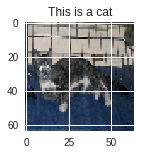

In [7]:
show_image(X_train.T, y_train.T, 3)

In [8]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix
clf = LogisticRegressionCV()
X_train_lr, y_train_lr = X_train.T, y_train.T.ravel()
clf.fit(X_train_lr, y_train_lr)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase t

KeyboardInterrupt: ignored

### GitHub

For a full discussion of interactions between Colab and GitHub, see [Using Colab with GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb). As a brief summary:

To save a copy of your Colab notebook to Github, select *File → Save a copy to GitHub…*

To load a specific notebook from github, append the github path to http://colab.research.google.com/github/.
For example to load this notebook in Colab: [https://github.com/tensorflow/docs/blob/master/site/en/tutorials/_index.ipynb](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/_index.ipynb) use the following Colab URL: [https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/_index.ipynb](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/_index.ipynb)

To open a github notebook in one click, we recommend installing the [Open in Colab Chrome Extension](https://chrome.google.com/webstore/detail/open-in-colab/iogfkhleblhcpcekbiedikdehleodpjo).



### Visualization

Colaboratory includes widely used libraries like [matplotlib](https://matplotlib.org/), simplifying visualization.

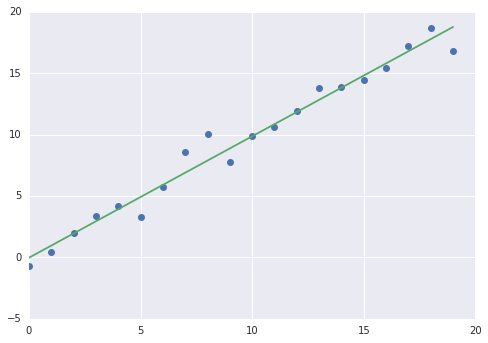

In [0]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(20)
y = [x_i + np.random.randn(1) for x_i in x]
a, b = np.polyfit(x, y, 1)
_ = plt.plot(x, y, 'o', np.arange(20), a*np.arange(20)+b, '-')

Want to use a new library?  `pip install` it at the top of the notebook. Then that library can be used anywhere else in the notebook. For recipes to import commonly used libraries, refer to the [importing libraries example notebook](/notebooks/snippets/importing_libraries.ipynb).

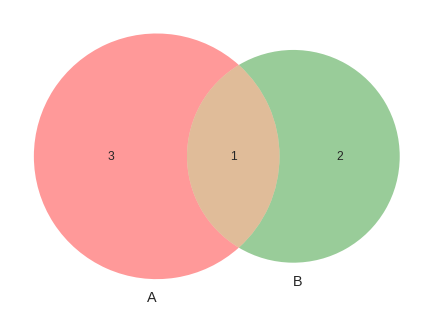

In [0]:
!pip install -q matplotlib-venn

from matplotlib_venn import venn2
_ = venn2(subsets = (3, 2, 1))

### Forms

Forms can be used to parameterize code. See the [forms example notebook](/notebooks/forms.ipynb) for more details.

In [0]:
#@title Examples

text = 'value' #@param 
date_input = '2018-03-22' #@param {type:"date"}
number_slider = 0 #@param {type:"slider", min:-1, max:1, step:0.1}
dropdown = '1st option' #@param ["1st option", "2nd option", "3rd option"]


### Local runtime support

Colab  supports connecting to a Jupyter runtime on your local machine. For more information, see our [documentation](https://research.google.com/colaboratory/local-runtimes.html).